**PREDICTING HEART DISEASE USING MACHINE LEARNING**

This notebook looks into using various Python-based machine learning and data science libaries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

In [32]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns 

%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from scikitplot.metrics import plot_roc_curve

In [2]:
data=pd.read_csv("./heart-disease (1).csv")
data.shape   #rows,columns

(303, 14)

In [3]:
data["target"].value_counts()  #1=yes and 0=no

target
1    165
0    138
Name: count, dtype: int64

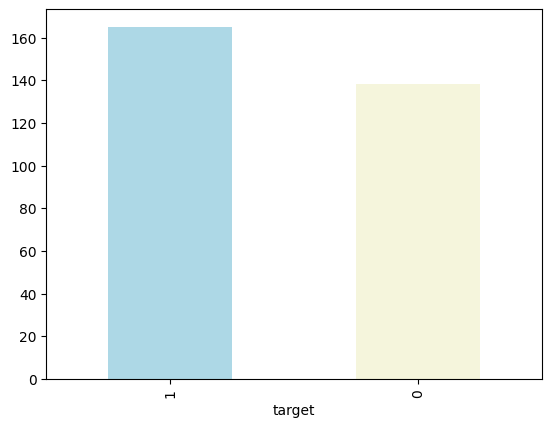

In [4]:
data["target"].value_counts().plot(kind="bar",color=["lightblue","beige"]);

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.isna().sum()  #to check if there is mising values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.describe()   #every column to number

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Heart Disease Frequency according to sex**

In [9]:
data.sex.value_counts()   #1=>male and 0=>female

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
# Compare target woth sex column
pd.crosstab(data.target,data.sex)

sex,0,1
target,,
0,24,114
1,72,93


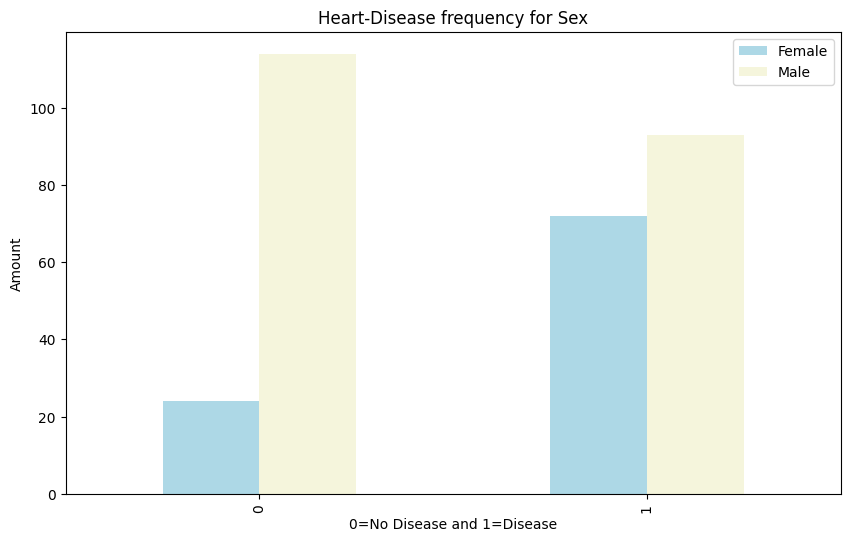

In [39]:
# Create a plot of crosstab
pd.crosstab(data.target,data.sex).plot(kind="bar",figsize=(10,6),color=["lightblue","beige"])

plt.title("Heart-Disease frequency for Sex")
plt.xlabel("0=No Disease and 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])


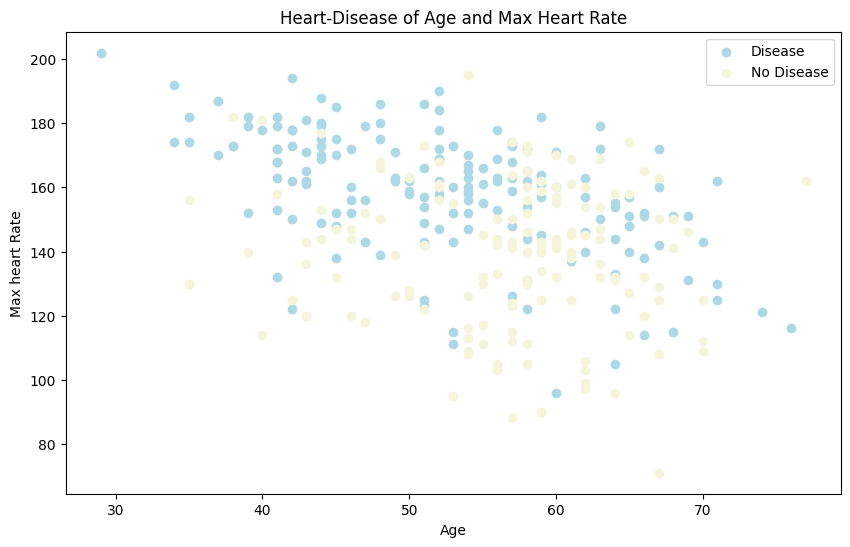

In [21]:
# Create another figure
plt.figure(figsize=(10,6))

# /Scatter with +ve examples
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            c="lightblue"
            );
# /Scatter with -ve examples
plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            c="beige"
            );

plt.title("Heart-Disease of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max heart Rate")
plt.legend(["Disease","No Disease"]);

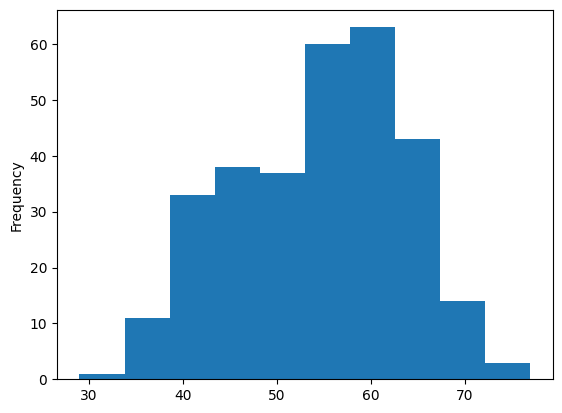

In [22]:
# Check distribution of age column
data.age.plot.hist();

**Heart Disease Frequency according to chest pain type**

In [23]:
pd.crosstab(data.cp,data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


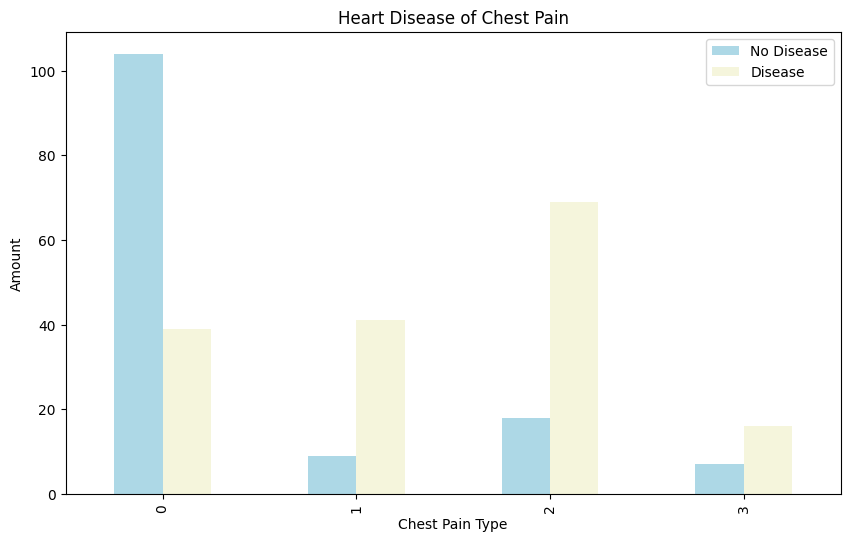

In [38]:
# Make the crosstab more visual
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(10,6),color=["lightblue","beige"])

plt.title("Heart Disease of Chest Pain")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])


In [26]:
# Make a correlation matrix
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


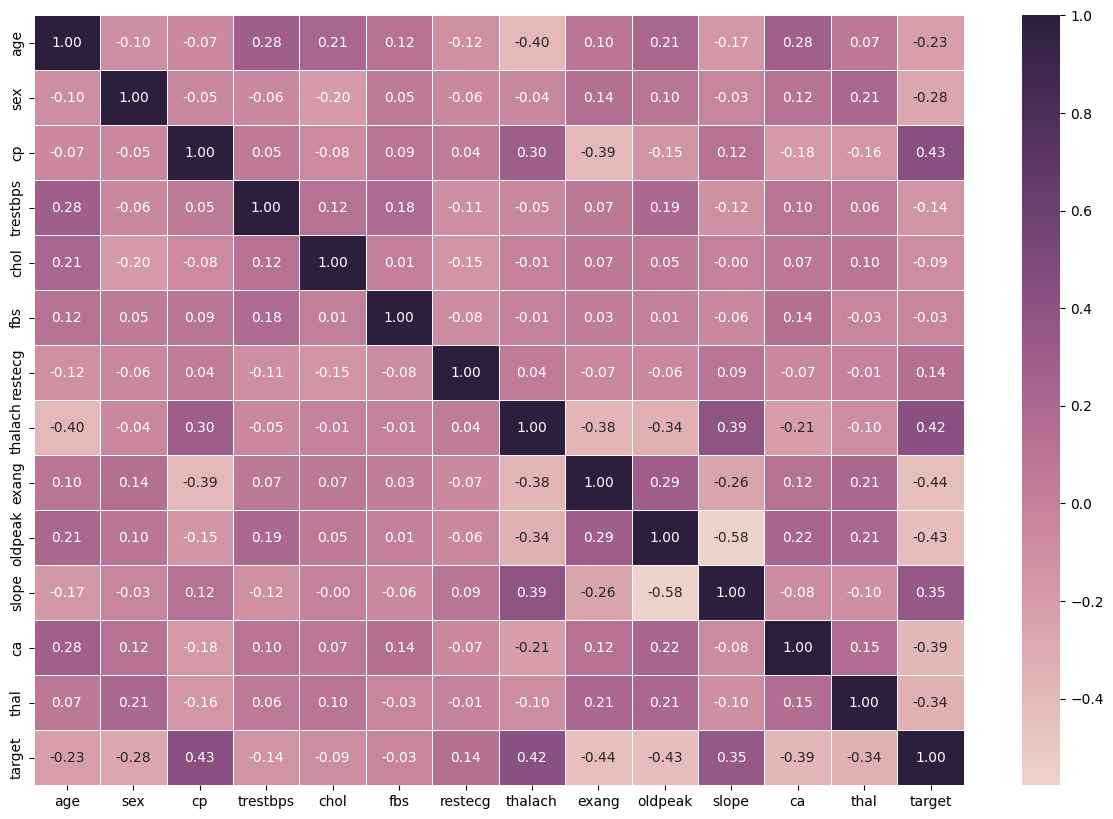

In [37]:

corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap=sns.cubehelix_palette(as_cmap=True));


